# Linear problem

In [105]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# in this tutorial, we will generate our samples ourselves
# with nsamples in each category
nexamples = 500

In [106]:
normal = np.random.multivariate_normal
# squared width
s2 = 1
# below we provide the coordinates of the mean as a first argument
# and then the covariance matrix
# we generate nexamples for each categories
sgx0 = normal([0., 0.], [[s2, 0.], [0., s2]], nexamples)
sgx1 = normal([2., 2.], [[s2, 0.], [0., s2]], nexamples)
# setting the labels for each category
sgy0 = np.zeros((nexamples,))
sgy1 = np.ones((nexamples,))

In [107]:
print(f"sgx0 : \n {sgx0[:5]}")
print(f"sgx1 : \n {sgx1[:5]}")

sgx0 : 
 [[-1.20542303  0.73785004]
 [ 0.93047046  0.75905669]
 [-0.92536229 -0.19373609]
 [-0.52474196 -0.1827901 ]
 [ 0.87647773  1.00189751]]
sgx1 : 
 [[1.59000496 0.67636235]
 [2.95613384 1.27069582]
 [3.67909777 3.45856501]
 [2.24083296 3.20250875]
 [1.77711866 2.41238049]]


In [108]:
print(f"sgy0 : \n {sgy0[:5]}")
print(f"sgy1 : \n {sgy1[:5]}")

sgy0 : 
 [0. 0. 0. 0. 0.]
sgy1 : 
 [1. 1. 1. 1. 1.]


Text(0, 0.5, 'x2')

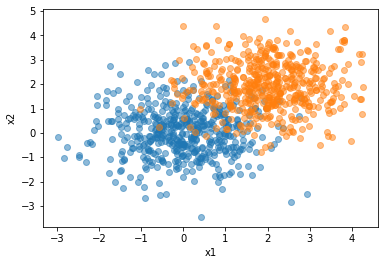

In [109]:
plt.scatter(sgx0[:,0], sgx0[:,1], alpha=0.5)
plt.scatter(sgx1[:,0], sgx1[:,1], alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")

In [110]:
sgx = np.concatenate((sgx0, sgx1))
sgy = np.concatenate((sgy0, sgy1))
print(sgx.shape, sgy.shape)

(1000, 2) (1000,)


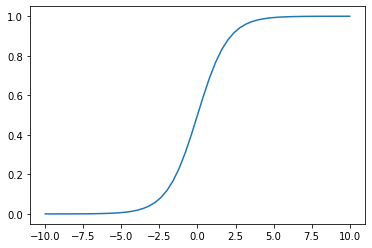

In [111]:
# define parameters
# the bias
b = 0
# the weight
w = 1
def sigmoid(x1):
    # z is a linear function of x1
    z = w * x1 + b
    return 1 / (1 + np.exp(-z))
# create an array of evenly spaced values
linx = np.linspace(-10, 10, 51)
plt.plot(linx, sigmoid(linx))

In [112]:
# 2D sigmoid
# bias
b = 0
# x1 weight
w1 = 1
# x2 weight
w2 = 2
def sigmoid_2d(x1, x2):
    # z is a linear function of x1 and x2
    z = w1 * x1 + w2 * x2 + b
    return 1 / (1 + np.exp(-z))

In [113]:
xmin, xmax, npoints= (-6, 6, 51)
linx1 = np.linspace(xmin, xmax, npoints)
# no need for a new array, we juste reuse the one we have with another name
linx2 = linx1

In [114]:
gridx1, gridx2 = np.meshgrid(np.linspace(xmin, xmax, npoints), np.linspace(xmin, xmax, npoints))
print(gridx1.shape, gridx2.shape)
print(f"gridx1 : \n {gridx1[:1]}")
print(f"gridx2 : \n {gridx2[:1]}")

(51, 51) (51, 51)
gridx1 : 
 [[-6.   -5.76 -5.52 -5.28 -5.04 -4.8  -4.56 -4.32 -4.08 -3.84 -3.6  -3.36
  -3.12 -2.88 -2.64 -2.4  -2.16 -1.92 -1.68 -1.44 -1.2  -0.96 -0.72 -0.48
  -0.24  0.    0.24  0.48  0.72  0.96  1.2   1.44  1.68  1.92  2.16  2.4
   2.64  2.88  3.12  3.36  3.6   3.84  4.08  4.32  4.56  4.8   5.04  5.28
   5.52  5.76  6.  ]]
gridx2 : 
 [[-6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.
  -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6. -6.]]


In [115]:
z = sigmoid_2d(gridx1, gridx2)
z.shape

(51, 51)

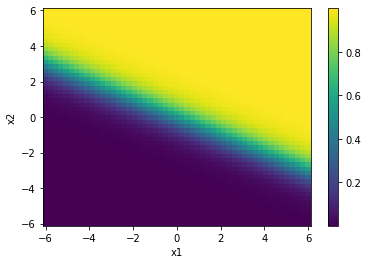

In [116]:
plt.pcolor(gridx1, gridx2, z)
plt.xlabel("x1")
plt.ylabel("x2")
plt.colorbar()

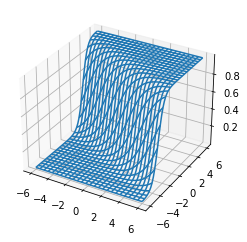

In [117]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot_wireframe(gridx1, gridx2, z)

In [118]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="lbfgs")
clf.fit(sgx, sgy)

LogisticRegression()

In [119]:
print(gridx1.shape, gridx2.shape)

(51, 51) (51, 51)


In [120]:
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
prob = clf.predict_proba(grid)
prob.shape

(2601, 2)

Text(0, 0.5, 'x2')

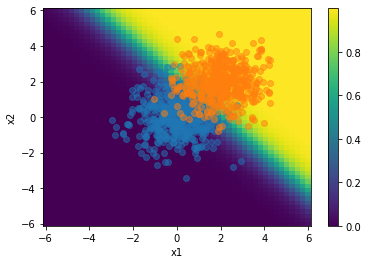

In [121]:
# note that prob[:,1] returns, for all exemples,
# the probability p to belong to category 1. 
# prob[:,0] would return the probability to belong 
# to category 0 (which is 1-p)
plt.pcolor(gridx1, gridx2, prob[:, 1].reshape(npoints, npoints))
plt.colorbar()
plt.scatter(sgx0[:, 0], sgx0[:, 1], alpha=0.5)
plt.scatter(sgx1[:, 0], sgx1[:, 1], alpha=0.5)
plt.xlabel("x1")
plt.ylabel("x2")

# Non-linear problem

### With logistic regression

In [122]:
x1 = np.random.uniform(-1, 1, nexamples)
x2 = np.random.uniform(-1, 1, nexamples)

In [123]:
# stacking the x1, x2 values into an array of shape (nexamples, 2)
# this array contains the examples of both categories, so all examples in the plane
srx = np.column_stack((x1, x2))
# select examples for category 0
srx0 = srx[x1 * x2 >= 0]
# select examples for category 1
srx1 = srx[x1 * x2 < 0]

Text(0, 0.5, 'x2')

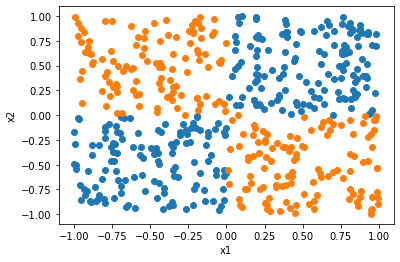

In [124]:
plt.scatter(srx0[:, 0], srx0[:, 1])
plt.scatter(srx1[:, 0], srx1[:, 1])
plt.xlabel("x1")
plt.ylabel("x2")

Text(0, 0.5, 'Category')

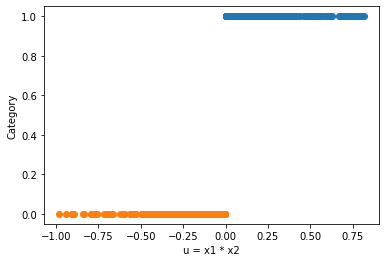

In [125]:
# category 0: 
# for all examples in category 0, 
# we take the product x1*x2
sru0 = srx0[:, 0] * srx0[:, 1]
# and we assign 1 as a label to this category
sry0 = np.ones(len(sru0))
# same with category 1
sru1 = srx1[:, 0] * srx1[:, 1]
sry1 = np.zeros(len(sru1))
plt.scatter(sru0, sry0)
plt.scatter(sru1, sry1)
plt.xlabel("u = x1 * x2")
plt.ylabel("Category")

In [126]:
# merge the examples from the two categories
sru = np.concatenate((sru0, sru1))
# turn the resulting array into an array of shape
# (nexamples, 1), that can be fitted by 
# scikit-learn
sru = np.c_[sru]
# merge the labels from the two categories
sry = np.concatenate((sry0, sry1))
# create the logistic regression and fit
clf = LogisticRegression(random_state=0, solver="lbfgs").fit(sru, sry)

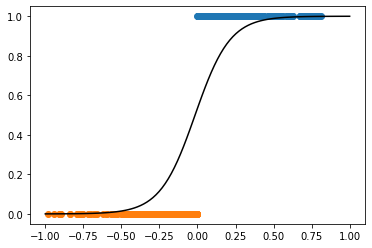

In [127]:
linx = np.c_[np.linspace(-1, 1, 100)]
prob = clf.predict_proba(linx)
prob = prob[:,1].reshape(len(linx))
plt.plot(linx, prob, color="black")
plt.scatter(sru0, sry0)
plt.scatter(sru1, sry1)

In [128]:
xmin, xmax, npoints = (-1, 1, 100)
gridx1, gridx2 = np.meshgrid(np.linspace(xmin, xmax, npoints), np.linspace(xmin, xmax, npoints))
gridu = gridx1 * gridx2
us = np.c_[gridu.flatten()]
probs = clf.predict_proba(us)
probs[:, 1].shape

(10000,)

Text(0, 0.5, 'x2')

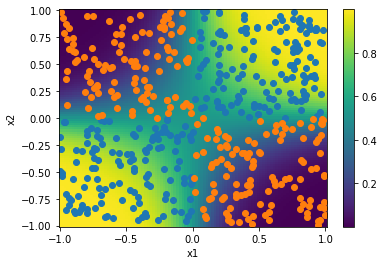

In [129]:
plt.pcolor(gridx1, gridx2, probs[:, 1].reshape(npoints, npoints))
plt.colorbar()
plt.scatter(srx0[:, 0], srx0[:, 1])
plt.scatter(srx1[:, 0], srx1[:, 1])
plt.xlabel('x1')
plt.ylabel('x2')

### With neural network

In [130]:
srx = np.concatenate((srx0, srx1))
sry = np.concatenate((sry0, sry1))

In [131]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50), activation="relu", max_iter=10000)
mlp.fit(srx, sry)

MLPClassifier(hidden_layer_sizes=50, max_iter=10000)

In [132]:
x1 = np.random.uniform(-1, 1, nexamples)
x2 = np.random.uniform(-1, 1, nexamples)
x = np.column_stack((x1, x2))
xt0 = x[x1 * x2 > 0]
xt1 = x[x1 * x2 < 0]
yt0 = np.ones(len(xt0))
yt1 = np.zeros(len(xt1))
xt = np.c_[np.concatenate((xt0, xt1))]
yt = np.concatenate((yt0, yt1))
print(xt.shape)

(500, 2)


In [133]:
from sklearn.metrics import accuracy_score
# predict the category for all test examples
predictions = mlp.predict(xt)
# compare the predictions to the true categories and compute the accuracy
accuracy_score(yt, predictions)

0.988

Text(0, 0.5, 'x2')

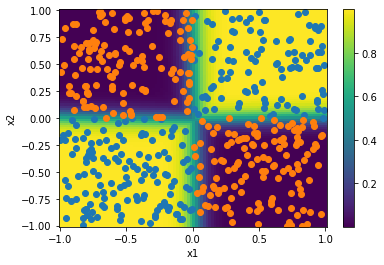

In [134]:
grid = np.c_[gridx1.flatten(), gridx2.flatten()]
probs = mlp.predict_proba(grid)
plt.pcolor(gridx1, gridx2, probs[:, 1].reshape(npoints, npoints))
plt.colorbar()
plt.scatter(xt0[:, 0], xt0[:, 1])
plt.scatter(xt1[:, 0], xt1[:, 1])
plt.xlabel("x1")
plt.ylabel("x2")